In [2]:
import os

In [3]:
your_local_apth = os.getcwd()

In [4]:
your_local_apth

'D:\\Study\\Python\\Projects\\Twitter_Sentiments'

In [5]:
import tweepy
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [6]:
## setup authentication from twitter
auth = tweepy.OAuthHandler("5wjkm7XDePiItLbtSdD09w4ea","kRmS6vA9NatNQhlTrl9MGXEiaRGcovr9sjxdBjCAq----")
auth.set_access_token("551720557-TsQ2TyMGMRWC5c0DG4LUyHz3D9fBRUIlpTixdpeo","FFfVeYC5v8tqZ0ZRdu1jAnEVshEMVmyt52eeOxa****")
api = tweepy.API(auth)


In [7]:
# enter tweeter username like elonmusk, narendramodi
# username = str(input("Enter tweeter name"))
#username = "elonmusk"
tweets = tweepy.Cursor(api.user_timeline, screen_name='narendramodi', tweet_mode = 'extended').items()

Enter tweeter namenarendramodi


In [8]:
tweets

In [9]:
## Create a list of dictionar where each tweet has following fields
tweet_dict_list = []
#for t in tqdm(tweets):
for t in tweepy.Cursor(api.user_timeline, screen_name=username, tweet_mode = 'extended').items():
    d = {}
    d['created_at'] = t.created_at
    d['favorite_count'] = t.favorite_count
    d['retweet_count']  = t.retweet_count
    d['full_text'] = t.full_text
    d['screen_name'] = t.user.screen_name
    tweet_dict_list.append(d)

In [10]:
tweet_dict_list[100]

{'created_at': datetime.datetime(2019, 5, 12, 10, 22, 17),
 'favorite_count': 21139,
 'retweet_count': 5037,
 'full_text': 'मैंने यूपी की जनता से सवाल पूछा, आतंक को करारा जवाब कौन दे सकता है।\n\nजानिए जनता का मिजाज। https://t.co/juzx4tr6tr',
 'screen_name': 'narendramodi'}

In [11]:
## Fearure engineering
## adding virality for each tweet:- favoriye_count+ 10* retweet_count
full_tweets = []
for tweet in tweet_dict_list:
    full_tweets.append(tweet['full_text'].lower().replace('\n',' '))
    tweet['virality'] = tweet['favorite_count'] + tweet['retweet_count']*10


In [12]:
## Cleaning
cleaned_tweets = []
for tweet in full_tweets:
    storage = []
    for word in tweet.split():
        if len(word) <3:
            continue
        if '@' in word:
            continue
        if 'https://' in word:
            continue
        if 'http://' in word:
            continue
        storage.append(word)
    cleaned_tweets.append(' '.join(storage))
    
for i, tweet in enumerate(tweet_dict_list):
    tweet['cleaned_text'] = cleaned_tweets[i]
        

In [13]:
## converting tweet in dataframe
df_tweets = pd.DataFrame.from_dict(tweet_dict_list)

In [14]:
df_tweets.head()

,cleaned_text,created_at,favorite_count,full_text,retweet_count,screen_name,virality
0,with the nda family. our alliance represents i...,2019-05-21 16:47:47,25443,With the NDA family. \n\nOur alliance represen...,5339,narendramodi,78833
1,our nations mark seven decades our diplomatic ...,2019-05-21 04:48:30,23708,As our nations mark seven decades of our diplo...,3305,narendramodi,56758
2,heartiest congratulations your re-election! tw...,2019-05-21 04:48:29,31637,Heartiest congratulations @jokowi on your re-e...,4969,narendramodi,81327
3,saat kita menandai tujuh dekade hubungan diplo...,2019-05-21 04:47:14,12062,Saat kita menandai tujuh dekade hubungan diplo...,1869,narendramodi,30752
4,selamat yang sebesar-besarnya kepada atas terp...,2019-05-21 04:47:12,20837,Selamat yang sebesar-besarnya kepada @jokowi a...,4311,narendramodi,63947


In [15]:
df_tweets.shape

(3241, 7)

In [16]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 7 columns):
cleaned_text      3241 non-null object
created_at        3241 non-null datetime64[ns]
favorite_count    3241 non-null int64
full_text         3241 non-null object
retweet_count     3241 non-null int64
screen_name       3241 non-null object
virality          3241 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 177.3+ KB


In [17]:
df_tweets.describe()

,favorite_count,retweet_count,virality
count,3241.000000,3241.000000,3241.000000
mean,15359.966985,3655.207652,51912.043505
std,15531.963215,3610.856043,50952.745414
min,0.000000,41.000000,485.000000
25%,6438.000000,1629.000000,22467.000000
50%,11582.000000,2871.000000,40276.000000
75%,18766.000000,4465.000000,63421.000000
max,270491.000000,65534.000000,925831.000000


In [18]:
# feature engineering
# add two features
df_tweets['Hours'] = df_tweets.created_at.apply(lambda x: x.hour)
df_tweets['Day_name'] = df_tweets.created_at.dt.day_name()

In [19]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 9 columns):
cleaned_text      3241 non-null object
created_at        3241 non-null datetime64[ns]
favorite_count    3241 non-null int64
full_text         3241 non-null object
retweet_count     3241 non-null int64
screen_name       3241 non-null object
virality          3241 non-null int64
Hours             3241 non-null int64
Day_name          3241 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 228.0+ KB


Text(0.5, 0, 'Day')

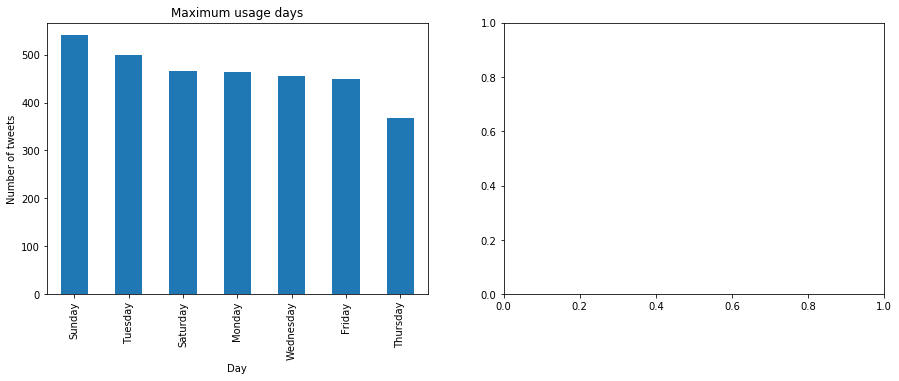

In [20]:
## plotting
## plot tweets by week day
fig,ax = plt.subplots(1,2)
df_tweets.created_at.dt.weekday_name.value_counts().plot(kind='bar', figsize=(15,5),ax = fig.axes[0])
ax[0].set_title('Maximum usage days')
ax[0].set_ylabel('Number of tweets')
ax[0].set_xlabel('Day')

In [21]:
## most popular tweets
df_tweet_pop = df_tweets.groupby(['created_at','cleaned_text'],as_index=False)['retweet_count'].sum().sort_values(by='retweet_count',ascending=False)

In [22]:
df_tweet_pop.head(10)

,created_at,cleaned_text,retweet_count
2143,2019-03-01 16:34:29,welcome home wing commander abhinandan! the na...,65534
2330,2019-03-16 03:30:15,your chowkidar standing firm &amp; serving the...,55484
2010,2019-02-14 13:16:57,attack crpf personnel pulwama despicable. stro...,40572
2014,2019-02-15 16:29:33,"salute you, brave sons mother india. you lived...",37275
2423,2019-03-27 07:11:27,#missionshakti special for reasons: (1) india ...,34889
2419,2019-03-27 05:53:17,"मेरे प्यारे देशवासियों, सवेरे लगभग 11.45 12.00...",32636
2342,2019-03-17 15:29:12,shri manohar parrikar was unparalleled leader....,29344
2013,2019-02-15 06:21:54,grateful nation bows the martyrs pulwama. befi...,27929
2334,2019-03-17 12:21:24,"fellow indians, happy that #mainbhichowkidar h...",27532
2133,2019-02-26 09:29:53,"सौगंध मुझे मिट्टी की, मैं देश नहीं झुकने दूंगा...",26304


In [23]:
## which words are commonly used
from wordcloud import WordCloud

In [24]:
def plot_wordcloud(msg):
    plt.figure(figsize=(8,8))
    wordcloud = WordCloud(max_words=100,max_font_size=120,background_color="white").generate(", ".join(msg))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    img_path = './wordcloud.png'
    wordcloud.to_file(img_path)
    

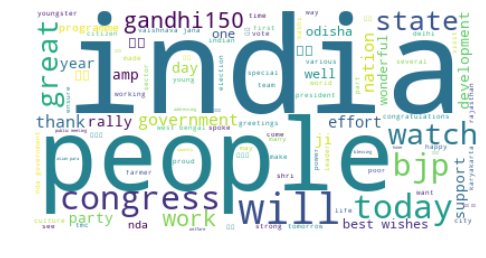

In [25]:
plot_wordcloud(df_tweets['cleaned_text'])

In [26]:
## Analyze sentiment of tweets
from textblob import TextBlob
import re

In [27]:
# method to remove links and special characters
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w+:\/\/\S+)"," ",tweet).split())
        

In [28]:
# helper function to clean tweets
from string import punctuation 
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [29]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    #final_analysis  = TextBlob(processTweet(analysis))
    if analysis.sentiment.polarity > 0:
        return 1
    if analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [30]:
def analyze_sentiment_by_deep_cleaning(tweet):
    analysis = TextBlob(processTweet(tweet))
    #final_analysis  = TextBlob(processTweet(analysis))
    if analysis.sentiment.polarity > 0:
        return 1
    if analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [31]:
df_tweets['SA'] = np.array([analyze_sentiment_by_deep_cleaning(tweet) for tweet in df_tweets['cleaned_text']])

In [32]:
##  df_tweets['SAA'] = df_tweets['full_text'].map(analyze_sentiment)



In [33]:
df_tweets.head()

,cleaned_text,created_at,favorite_count,full_text,retweet_count,screen_name,virality,Hours,Day_name,SA
0,with the nda family. our alliance represents i...,2019-05-21 16:47:47,25443,With the NDA family. \n\nOur alliance represen...,5339,narendramodi,78833,16,Tuesday,1
1,our nations mark seven decades our diplomatic ...,2019-05-21 04:48:30,23708,As our nations mark seven decades of our diplo...,3305,narendramodi,56758,4,Tuesday,0
2,heartiest congratulations your re-election! tw...,2019-05-21 04:48:29,31637,Heartiest congratulations @jokowi on your re-e...,4969,narendramodi,81327,4,Tuesday,1
3,saat kita menandai tujuh dekade hubungan diplo...,2019-05-21 04:47:14,12062,Saat kita menandai tujuh dekade hubungan diplo...,1869,narendramodi,30752,4,Tuesday,0
4,selamat yang sebesar-besarnya kepada atas terp...,2019-05-21 04:47:12,20837,Selamat yang sebesar-besarnya kepada @jokowi a...,4311,narendramodi,63947,4,Tuesday,0


In [34]:
display(df_tweets.head())

,cleaned_text,created_at,favorite_count,full_text,retweet_count,screen_name,virality,Hours,Day_name,SA
0,with the nda family. our alliance represents i...,2019-05-21 16:47:47,25443,With the NDA family. \n\nOur alliance represen...,5339,narendramodi,78833,16,Tuesday,1
1,our nations mark seven decades our diplomatic ...,2019-05-21 04:48:30,23708,As our nations mark seven decades of our diplo...,3305,narendramodi,56758,4,Tuesday,0
2,heartiest congratulations your re-election! tw...,2019-05-21 04:48:29,31637,Heartiest congratulations @jokowi on your re-e...,4969,narendramodi,81327,4,Tuesday,1
3,saat kita menandai tujuh dekade hubungan diplo...,2019-05-21 04:47:14,12062,Saat kita menandai tujuh dekade hubungan diplo...,1869,narendramodi,30752,4,Tuesday,0
4,selamat yang sebesar-besarnya kepada atas terp...,2019-05-21 04:47:12,20837,Selamat yang sebesar-besarnya kepada @jokowi a...,4311,narendramodi,63947,4,Tuesday,0


In [35]:
## type of tweets
pos_tweets = df_tweets[df_tweets['SA']>0]['cleaned_text'].count()
neg_tweets = df_tweets[df_tweets['SA']<0]['cleaned_text'].count()
neu_tweets = df_tweets[df_tweets['SA']==0]['cleaned_text'].count()


In [36]:
print("Percentage of positive tweets {0}%".format(pos_tweets*100/len(df_tweets['cleaned_text'])))
print("Percentage of nagative tweets {0}%".format(neg_tweets*100/len(df_tweets['cleaned_text'])))
print("Percentage of neutral tweets {0}%".format(neu_tweets*100/len(df_tweets['cleaned_text'])))

Percentage of positive tweets 54.149953717988275%
Percentage of nagative tweets 7.682813946312867%
Percentage of neutral tweets 38.167232335698856%


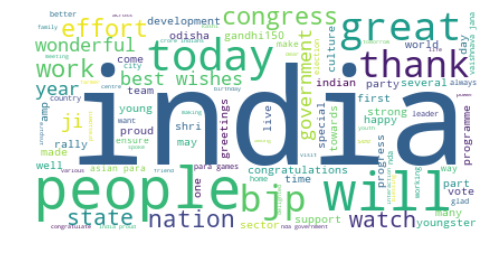

In [37]:
plot_wordcloud(df_tweets[df_tweets['SA']>0]['cleaned_text'])

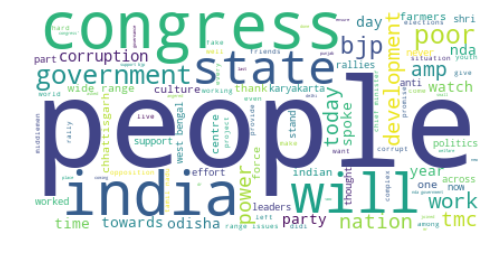

In [39]:
plot_wordcloud(df_tweets[df_tweets['SA']<0]['cleaned_text'])

In [40]:
## sentiments
from indicoio import political, sentiment, language, text_tags, keywords, fer

In [41]:
x_emotion = df_tweets.cleaned_text.values.tolist()

In [42]:
x_emotion

["with the nda family. our alliance represents india's diversity and our agenda india's progress. are best suited address regional aspirations and enhance national progress.",
 'our nations mark seven decades our diplomatic relationship, look forward working closely with you further deepen our bilateral comprehensive strategic partnership.',
 'heartiest congratulations your re-election! two large democracies, take collective pride successful celebration democracy. wish you and people indonesia all success under your dynamic leadership.',
 'saat kita menandai tujuh dekade hubungan diplomatik kita, saya berharap dapat bekerja sama dengan anda untuk semakin memperdalam kemitraan strategis komprehensif bilateral kita.',
 'selamat yang sebesar-besarnya kepada atas terpilihnya anda kembali! sebagai dua negara demokrasi besar, kami bangga atas keberhasilan perayaan demokrasi. kami berharap anda dan rakyat indonesia semua sukses bawah kepemimpinan dinamis anda.',
 'tributes former shri rajiv g

In [43]:
import indicoio

In [44]:
#create account in indicoio and get key
indicoio.config.api_key = '#######********************++++++++++++'
# single example
b = indicoio.emotion(x_emotion)
myvalues = [max(b[i], key = b[i].get) for i in range(len(b))]
df_tweets['emotion'] = pd.Series((v for v in myvalues))

In [45]:
c = indicoio.personality(x_emotion)
myvalues = [max(c[i], key = c[i].get) for i in range(len(c))]
df_tweets['personality'] = pd.Series((v for v in myvalues))

In [46]:
df_tweets.head()

,cleaned_text,created_at,favorite_count,full_text,retweet_count,screen_name,virality,Hours,Day_name,SA,emotion,personality
0,with the nda family. our alliance represents i...,2019-05-21 16:47:47,25443,With the NDA family. \n\nOur alliance represen...,5339,narendramodi,78833,16,Tuesday,1,joy,openness
1,our nations mark seven decades our diplomatic ...,2019-05-21 04:48:30,23708,As our nations mark seven decades of our diplo...,3305,narendramodi,56758,4,Tuesday,0,joy,openness
2,heartiest congratulations your re-election! tw...,2019-05-21 04:48:29,31637,Heartiest congratulations @jokowi on your re-e...,4969,narendramodi,81327,4,Tuesday,1,joy,openness
3,saat kita menandai tujuh dekade hubungan diplo...,2019-05-21 04:47:14,12062,Saat kita menandai tujuh dekade hubungan diplo...,1869,narendramodi,30752,4,Tuesday,0,joy,conscientiousness
4,selamat yang sebesar-besarnya kepada atas terp...,2019-05-21 04:47:12,20837,Selamat yang sebesar-besarnya kepada @jokowi a...,4311,narendramodi,63947,4,Tuesday,0,joy,openness


Text(0.5, 0, 'Date')

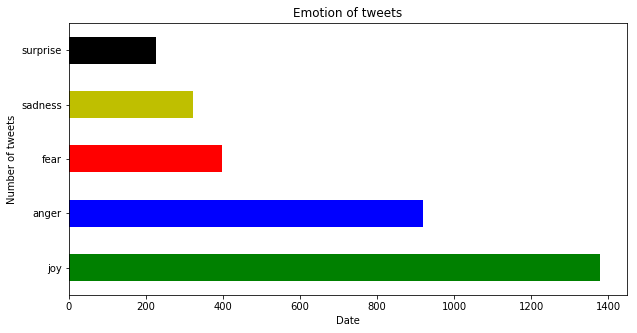

In [47]:
#plot
df_tweets.emotion.value_counts().nlargest(10).plot(kind='barh',figsize =(10,5), color=tuple(["g", "b","r","y","k"]))
plt.title('Emotion of tweets')
plt.ylabel('Number of tweets')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

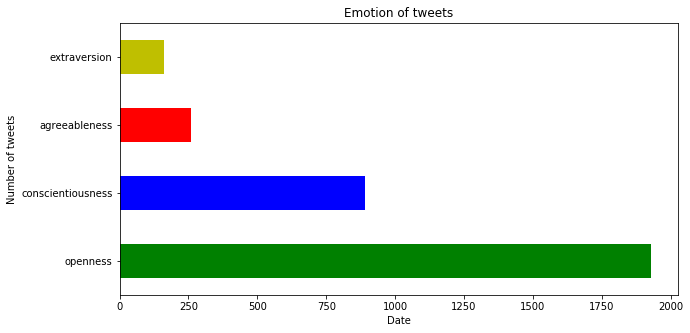

In [48]:
#plot
df_tweets.personality.value_counts().nlargest(10).plot(kind='barh',figsize =(10,5),color=tuple(["g", "b","r","y","k"]))
plt.title('Emotion of tweets')
plt.ylabel('Number of tweets')
plt.xlabel('Date')